In [1]:
library('C50')

In [3]:
data('churn')

In [4]:
ls()

[1] "churnTest"  "churnTrain"

In [5]:
str(churnTrain)

'data.frame':	3333 obs. of  20 variables:
 $ state                        : Factor w/ 51 levels "AK","AL","AR",..: 17 36 32 36 37 2 20 25 19 50 ...
 $ account_length               : int  128 107 137 84 75 118 121 147 117 141 ...
 $ area_code                    : Factor w/ 3 levels "area_code_408",..: 2 2 2 1 2 3 3 2 1 2 ...
 $ international_plan           : Factor w/ 2 levels "no","yes": 1 1 1 2 2 2 1 2 1 2 ...
 $ voice_mail_plan              : Factor w/ 2 levels "no","yes": 2 2 1 1 1 1 2 1 1 2 ...
 $ number_vmail_messages        : int  25 26 0 0 0 0 24 0 0 37 ...
 $ total_day_minutes            : num  265 162 243 299 167 ...
 $ total_day_calls              : int  110 123 114 71 113 98 88 79 97 84 ...
 $ total_day_charge             : num  45.1 27.5 41.4 50.9 28.3 ...
 $ total_eve_minutes            : num  197.4 195.5 121.2 61.9 148.3 ...
 $ total_eve_calls              : int  99 103 110 88 122 101 108 94 80 111 ...
 $ total_eve_charge             : num  16.78 16.62 10.3 5.26 12.61 ...

In [6]:
str(churnTest)

'data.frame':	1667 obs. of  20 variables:
 $ state                        : Factor w/ 51 levels "AK","AL","AR",..: 12 27 36 33 41 13 29 19 25 44 ...
 $ account_length               : int  101 137 103 99 108 117 63 94 138 128 ...
 $ area_code                    : Factor w/ 3 levels "area_code_408",..: 3 3 1 2 2 2 2 1 3 2 ...
 $ international_plan           : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ voice_mail_plan              : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 2 ...
 $ number_vmail_messages        : int  0 0 29 0 0 0 32 0 0 43 ...
 $ total_day_minutes            : num  70.9 223.6 294.7 216.8 197.4 ...
 $ total_day_calls              : int  123 86 95 123 78 85 124 97 117 100 ...
 $ total_day_charge             : num  12.1 38 50.1 36.9 33.6 ...
 $ total_eve_minutes            : num  212 245 237 126 124 ...
 $ total_eve_calls              : int  73 139 105 88 101 68 125 112 46 89 ...
 $ total_eve_charge             : num  18 20.8 20.2 10.7 10.5 ...
 $ tota

In [11]:
var_list = !names(churnTrain) %in% c('state','account_length','area_code')

In [13]:
churnTrain =churnTrain[,var_list]

In [15]:
churnTest = churnTest[,var_list]

In [16]:
str(churnTrain)

'data.frame':	3333 obs. of  17 variables:
 $ international_plan           : Factor w/ 2 levels "no","yes": 1 1 1 2 2 2 1 2 1 2 ...
 $ voice_mail_plan              : Factor w/ 2 levels "no","yes": 2 2 1 1 1 1 2 1 1 2 ...
 $ number_vmail_messages        : int  25 26 0 0 0 0 24 0 0 37 ...
 $ total_day_minutes            : num  265 162 243 299 167 ...
 $ total_day_calls              : int  110 123 114 71 113 98 88 79 97 84 ...
 $ total_day_charge             : num  45.1 27.5 41.4 50.9 28.3 ...
 $ total_eve_minutes            : num  197.4 195.5 121.2 61.9 148.3 ...
 $ total_eve_calls              : int  99 103 110 88 122 101 108 94 80 111 ...
 $ total_eve_charge             : num  16.78 16.62 10.3 5.26 12.61 ...
 $ total_night_minutes          : num  245 254 163 197 187 ...
 $ total_night_calls            : int  91 103 104 89 121 118 118 96 90 97 ...
 $ total_night_charge           : num  11.01 11.45 7.32 8.86 8.41 ...
 $ total_intl_minutes           : num  10 13.7 12.2 6.6 10.1 6.3 7.5 7.1

In [19]:
set.seed(2)
ind = sample(x=c(1,2),size=nrow(churnTrain),replace=T,prob=c(0.7,0.3))

In [23]:
trainset = churnTrain[ind == 1,]

In [24]:
validationset = churnTrain[ind == 2,]

In [25]:
library(rpart)

In [29]:
churn.rp = rpart(churn~.,data=trainset,control=rpart.control(minsplit=20))

In [30]:
summary(churn.rp)

Call:
rpart(formula = churn ~ ., data = trainset, control = rpart.control(minsplit = 20))
  n= 2315 

          CP nsplit rel error    xerror       xstd
1 0.07602339      0 1.0000000 1.0000000 0.04992005
2 0.07456140      2 0.8479532 0.9590643 0.04906076
3 0.05555556      4 0.6988304 0.7953216 0.04530196
4 0.02631579      7 0.4941520 0.5233918 0.03757730
5 0.02339181      8 0.4678363 0.5263158 0.03767329
6 0.02046784     10 0.4210526 0.5175439 0.03738427
7 0.01754386     11 0.4005848 0.5058480 0.03699399
8 0.01000000     12 0.3830409 0.4970760 0.03669750

Variable importance
            total_day_minutes              total_day_charge 
                           18                            18 
number_customer_service_calls            total_intl_minutes 
                           10                             8 
            total_intl_charge              total_eve_charge 
                            8                             8 
            total_eve_minutes            internation

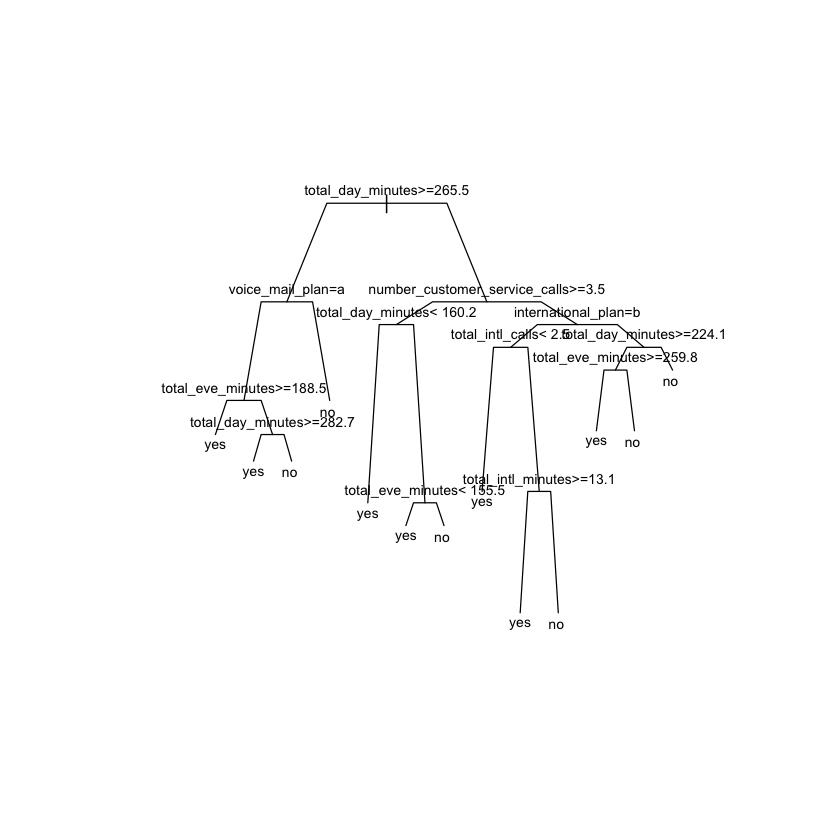

In [37]:
plot(churn.rp,margin=0.2,branch=0.6)
text(churn.rp,cex=0.7)

In [38]:
#install.packages('rpart.plot')
library('rpart.plot')

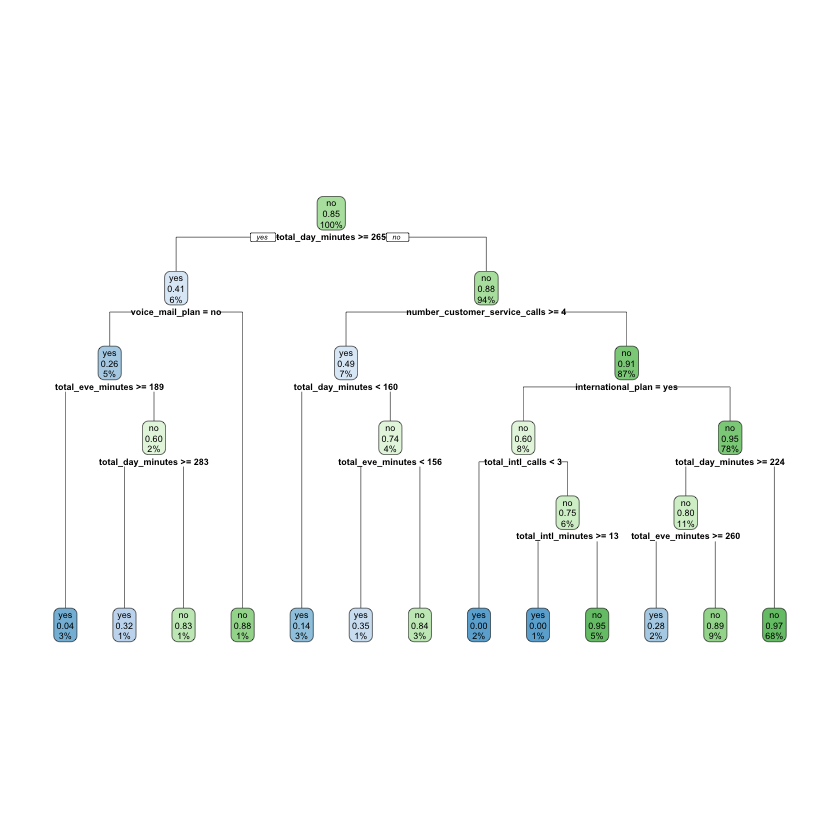

In [39]:
rpart.plot(churn.rp)